# 0101 - First Session With Python - Solution Notebook

* Written by Alexandre Gazagnes
* Last update: 2024-02-01

## About 

### Using Jupyter

You have 2 options: 
- Locally: 

    - **Install Anaconda https://www.anaconda.com/ or Jupyter https://jupyter.org/install on your machine**

    - Use Anaconda or Jupyter installed on the Unilasalle PC (**Warning ⚠️**: some packages may be missing) 


- Online:

    - **Use Google Colab https://colab.research.google.com/** (you have to be connected to your google account)

    - **Open this notebook on Google colab URL**
        * Badge

    - Use Jupyter online  https://jupyter.org/try-jupyter (**Warning ⚠️**: External packages cannot be installed) 


### Material

All the material for this course could be found here.
- https://github.com/AlexandreGazagnes/Unilassalle-Public-Ressources/tree/main/4a-data-analysis

### Python / Jupyter ? 

Few Questions : 
- Why Python
- Python vs R ? 
- What is Data Analysis ? 
- What are we talking about ? 
- What is Jupyter ?

### Context

You are a new employee of the NPO named "NPO".

You are in charged of data analysis.

First project is about GHG emissions, more precisely regarding Bovine Meat.

### Data

After a quick look on the internet, you find a very interesting dataset on the FAO website. It contains a list of various indicators. You decide to use this dataset to identify segments of countries.

- Find relevant data : 
    - https://www.kaggle.com/datasets/unitednations/global-food-agriculture-statistics
    - https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production
    - https://www.fao.org/faostat/en/
    - https://fr-en.openfoodfacts.org/
    - https://fr-en.openfoodfacts.org/data


**You can use a preprocessed version of the dataset [here](https://gist.githubusercontent.com/AlexandreGazagnes/2000e5c0e9149ffdb8c682a751ac448a/raw/35ad83320c26155415b7cccff8a4150ee80ee501/FAO_Unilassalle_raw.csv).** (Best option)



### Mission


Our job is to : 
* Prepare notebook environment
* Load data
* Explore data
* Clean data ==> Select relevant data
* Clean data ==> Handle missing values
* Clean data ==> Handle duplicates ? 
* Clean data ==> Handle outliers ?
* Perform some basic analysis and data inspection
* Perform some basic visualisation
* Export our data

### Usefull Ressources about Google Colab


- On Youtube : 
    - https://www.youtube.com/watch?v=8KeJZBZGtYo
    - https://www.youtube.com/watch?v=JJYZ3OE_lGo
    - https://www.youtube.com/watch?v=tCVXoTV12dE

### Usefull Ressources about Anaconda and Jupyter


- On Youtube : 
    - https://www.youtube.com/watch?v=ovlID7gefzE
    - https://www.youtube.com/watch?v=IMrxB8Mq5KU
    - https://www.youtube.com/watch?v=Ou-7G9VQugg
    - https://www.youtube.com/watch?v=5pf0_bpNbkw


### Teacher 

- More info : 
    - https://www.linkedin.com/in/alexandregazagnes/
    - https://github.com/AlexandreGazagnes
    

Youtube plyalist : 
* https://www.youtube.com/playlist?list=PLuU_Vh8r4mJDVJVyG3Lzv5ZTa0gMaWCRp

## Preliminaries

### System

These commands will display the system information:

Uncomment theses lines if needed. 

In [1]:
# pwd

In [2]:
# cd ..

In [3]:
# ls

In [4]:
# cd ..

In [5]:
# ls

These commands will install the required packages:

**Please note that if you are using google colab, all you need is already installed**

In [6]:
# !pip install pandas matplotlib seaborn plotly scikit-learn

This command will download the dataset:

**Please note that we will download the dataset later, in this notebook**

In [7]:
# !wget https://gist.githubusercontent.com/AlexandreGazagnes/2000e5c0e9149ffdb8c682a751ac448a/raw/35ad83320c26155415b7cccff8a4150ee80ee501/FAO_Unilassalle_raw.csv

### Imports

Import data libraries:

In [8]:
import pandas as pd  # DataFrame
import numpy as np  # Matrix and advanced maths operations

Import Graphical libraries:

In [9]:
import matplotlib.pyplot as plt  # Visualisation
import seaborn as sns  # Visualisation
import plotly.express as px  # Visualisation (not used here)

:warning:**These imports must be done, it is not possible to use this notebook without pandas, matplotlib etc.**

### Data

1st option : Download the dataset from the web

In [10]:
# url
url = "https://gist.githubusercontent.com/AlexandreGazagnes/2000e5c0e9149ffdb8c682a751ac448a/raw/35ad83320c26155415b7cccff8a4150ee80ee501/FAO_Unilassalle_raw.csv"
url

'https://gist.githubusercontent.com/AlexandreGazagnes/2000e5c0e9149ffdb8c682a751ac448a/raw/35ad83320c26155415b7cccff8a4150ee80ee501/FAO_Unilassalle_raw.csv'

Read the data : 

In [11]:
df = pd.read_csv(url, encoding="latin1")
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


2nd Option : Read data from a file

In [12]:
# # or

# fn = "my/awsome/respository/my_awsome_file.csv"
# fn = "./data/source/FAO.csv"
# df = pd.read_csv(fn, encoding='latin1')

## Data Exploration

### Display

Display the first rows of the dataset:

In [13]:
# head

df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


Display the last rows of the dataset:

In [14]:
# tail

df.tail(10)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
21467,ZWE,181,Zimbabwe,2943,Meat,5142,Food,1000 tonnes,-19.02,29.15,...,222.0,228.0,233.0,238.0,242.0,265.0,262.0,277.0,280,258
21468,ZWE,181,Zimbabwe,2945,Offals,5142,Food,1000 tonnes,-19.02,29.15,...,20.0,20.0,21.0,21.0,21.0,21.0,21.0,21.0,22,22
21469,ZWE,181,Zimbabwe,2946,Animal fats,5142,Food,1000 tonnes,-19.02,29.15,...,26.0,26.0,29.0,29.0,27.0,31.0,30.0,25.0,26,20
21470,ZWE,181,Zimbabwe,2949,Eggs,5142,Food,1000 tonnes,-19.02,29.15,...,15.0,18.0,18.0,21.0,22.0,27.0,27.0,24.0,24,25
21471,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5521,Feed,1000 tonnes,-19.02,29.15,...,21.0,21.0,21.0,21.0,21.0,23.0,25.0,25.0,30,31
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
21476,ZWE,181,Zimbabwe,2928,Miscellaneous,5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


Display a sample of the dataset:

In [15]:
# sample 10

df.sample(10)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
12021,MYS,131,Malaysia,2533,Sweet potatoes,5521,Feed,1000 tonnes,4.21,101.98,...,14.0,14.0,14.0,14.0,9.0,8.0,12.0,13.0,25,24
9697,ISR,105,Israel,2555,Soyabeans,5521,Feed,1000 tonnes,31.05,34.85,...,10.0,34.0,1.0,0.0,6.0,88.0,92.0,23.0,47,34
4956,HRV,98,Croatia,2601,Tomatoes and products,5142,Food,1000 tonnes,45.10,15.20,...,62.0,61.0,78.0,93.0,79.0,84.0,80.0,79.0,69,70
15947,ROU,183,Romania,2546,Beans,5521,Feed,1000 tonnes,45.94,24.97,...,19.0,20.0,5.0,0.0,0.0,0.0,0.0,3.0,0,0
15720,QAT,117,Republic of Korea,2617,Apples and products,5142,Food,1000 tonnes,35.91,127.77,...,305.0,347.0,389.0,611.0,387.0,341.0,274.0,152.0,143,155
11339,LSO,122,Lesotho,2618,Pineapples and products,5142,Food,1000 tonnes,-29.61,28.23,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,0
17652,SLB,25,Solomon Islands,2775,Aquatic Plants,5142,Food,1000 tonnes,-9.65,160.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6829,FIN,67,Finland,2605,"Vegetables, Other",5142,Food,1000 tonnes,61.92,25.75,...,279.0,304.0,289.0,305.0,299.0,332.0,324.0,350.0,327,357
9843,ITA,106,Italy,2558,Rape and Mustardseed,5521,Feed,1000 tonnes,41.87,12.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7014,FRA,68,France,2764,"Marine Fish, Other",5142,Food,1000 tonnes,46.23,2.21,...,6.0,7.0,2.0,6.0,15.0,22.0,16.0,17.0,11,12


In [16]:
# Sample with just 10% of the dataset

df.sample(frac=0.1)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
11925,MWI,130,Malawi,2578,Coconut Oil,5142,Food,1000 tonnes,-13.25,34.30,...,0.0,0.0,0.0,1.0,2.0,3.0,1.0,1.0,0,0
5137,CUB,49,Cuba,2765,Crustaceans,5142,Food,1000 tonnes,21.52,-77.78,...,1.0,1.0,1.0,0.0,1.0,2.0,2.0,3.0,4,5
105,ALB,3,Albania,2543,"Sweeteners, Other",5142,Food,1000 tonnes,41.15,20.17,...,2.0,6.0,15.0,25.0,54.0,72.0,75.0,83.0,90,93
15292,PHL,171,Philippines,2571,Soyabean Oil,5142,Food,1000 tonnes,12.88,121.77,...,53.0,31.0,44.0,38.0,8.0,7.0,26.0,23.0,22,20
9784,ISR,105,Israel,2913,Oilcrops,5142,Food,1000 tonnes,31.05,34.85,...,58.0,56.0,65.0,64.0,69.0,76.0,68.0,67.0,76,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16115,RUS,185,Russian Federation,2601,Tomatoes and products,5142,Food,1000 tonnes,61.52,105.32,...,2671.0,3117.0,3326.0,2856.0,3137.0,3354.0,3221.0,3619.0,3934,3906
1934,BLZ,23,Belize,2945,Offals,5142,Food,1000 tonnes,17.19,-88.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3857,CHL,40,Chile,2946,Animal fats,5521,Feed,1000 tonnes,-35.68,-71.54,...,255.0,189.0,194.0,200.0,194.0,126.0,130.0,200.0,141,90
15853,MDA,146,Republic of Moldova,2619,Dates,5142,Food,1000 tonnes,47.41,28.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


### Structure

What is the shape of the dataset?

In [17]:
# shape

df.shape

(21477, 63)

What data types are present in the dataset?

In [18]:
# dtypes

df.dtypes

Area Abbreviation     object
Area Code              int64
Area                  object
Item Code              int64
Item                  object
                      ...   
Y2009                float64
Y2010                float64
Y2011                float64
Y2012                  int64
Y2013                  int64
Length: 63, dtype: object

:warning: 
**Please note that we have here main python dtypes**
Data types : 
- int : *Integer* : 1,2,12332, 1_000_000
- float : *Float* : 1.243453, 198776.8789, 1.9776
- object : In this example object stands for *String* : "Paris", "Rouen", "Lea" 

Count the number of columns with specific data types:

In [19]:
# value_counts

df.dtypes.value_counts()

float64    53
object      5
int64       5
Name: count, dtype: int64

Select only string columns:

In [20]:
# select_dtypes

df.select_dtypes(include="object").head()

,Area Abbreviation,Area,Item,Element,Unit
0,AFG,Afghanistan,Wheat and products,Food,1000 tonnes
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes
2,AFG,Afghanistan,Barley and products,Feed,1000 tonnes
3,AFG,Afghanistan,Barley and products,Food,1000 tonnes
4,AFG,Afghanistan,Maize and products,Feed,1000 tonnes


Counting unique values for string columns : 

In [21]:
# nunique

df.select_dtypes(include="object").nunique()

Area Abbreviation    169
Area                 174
Item                 115
Element                2
Unit                   1
dtype: int64

### Select data

Display all the columns : 

In [22]:
# columns

df.columns

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')

Just use a small number of columns : 

In [23]:
columns = [
    "Area Abbreviation",
    "Area Code",
    "Area",
    "Item Code",
    "Item",
    "Element Code",
    "Element",
    "Unit",
    "latitude",
    "longitude",
    "Y2010",
    "Y2011",
    "Y2012",
    "Y2013",
]
columns

['Area Abbreviation',
 'Area Code',
 'Area',
 'Item Code',
 'Item',
 'Element Code',
 'Element',
 'Unit',
 'latitude',
 'longitude',
 'Y2010',
 'Y2011',
 'Y2012',
 'Y2013']

Make your column selection and display the output : 

In [24]:
# loc ? => JUST THE OUTPUT

df.loc[:, columns].head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,178.0,191.0,200,200


If this Transformation is OK, you can re-write your ```df``` variable : 

In [25]:
# loc ? => REWRITE the DF

df = df.loc[:, columns]
df.sample(10)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y2010,Y2011,Y2012,Y2013
19714,TKM,213,Turkmenistan,2905,Cereals - Excluding Beer,5142,Food,1000 tonnes,38.97,59.56,1019.0,1039.0,1036,1059
5660,DNK,54,Denmark,2924,Alcoholic Beverages,5142,Food,1000 tonnes,56.26,9.50,563.0,562.0,524,529
10599,KEN,114,Kenya,2945,Offals,5142,Food,1000 tonnes,-0.02,37.91,71.0,75.0,76,72
3572,CAF,37,Central African Republic,2617,Apples and products,5142,Food,1000 tonnes,6.61,20.94,0.0,0.0,0,0
18507,SWE,210,Sweden,2642,Cloves,5142,Food,1000 tonnes,60.13,18.64,0.0,0.0,0,0
19237,TGO,217,Togo,2743,Cream,5142,Food,1000 tonnes,8.62,0.82,0.0,0.0,0,0
2888,BGR,27,Bulgaria,2765,Crustaceans,5142,Food,1000 tonnes,42.73,25.49,1.0,1.0,1,2
345,AGO,7,Angola,2536,Sugar cane,5521,Feed,1000 tonnes,-11.20,17.87,5.0,5.0,5,5
7717,GHA,81,Ghana,2576,Palmkernel Oil,5142,Food,1000 tonnes,7.95,-1.02,9.0,11.0,11,11
3336,CMR,32,Cameroon,2734,Poultry Meat,5142,Food,1000 tonnes,7.37,12.35,68.0,70.0,71,73


Use ```iloc``` to select the nth line and the mth column : 

In [26]:
# iloc

n = 3
m = 3
df.iloc[n, m]

2513

Use ```iloc``` to select data from 1st to the nth line and from first to the mth column : 

In [27]:
# iloc

n = 3
m = 3
df.iloc[:n, :m]

,Area Abbreviation,Area Code,Area
0,AFG,2,Afghanistan
1,AFG,2,Afghanistan
2,AFG,2,Afghanistan


Just keep in mind the global shape of our dataset : 

In [28]:
df.sample(10)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,Y2010,Y2011,Y2012,Y2013
4850,CIV,107,Cï¿½te d'Ivoire,2633,Cocoa Beans and products,5142,Food,1000 tonnes,7.54,-5.55,90.0,119.0,212,283
4130,CHN,41,"China, mainland",2516,Oats,5521,Feed,1000 tonnes,35.86,104.20,430.0,400.0,500,500
3986,CHN,96,"China, Hong Kong SAR",2922,Stimulants,5142,Food,1000 tonnes,22.40,114.11,40.0,40.0,50,50
10070,JAM,109,Jamaica,2928,Miscellaneous,5142,Food,1000 tonnes,18.11,-77.30,2.0,3.0,1,2
3649,TCD,39,Chad,2535,Yams,5521,Feed,1000 tonnes,15.45,18.73,21.0,20.0,21,22
6538,ETH,238,Ethiopia,2513,Barley and products,5142,Food,1000 tonnes,9.15,40.49,1257.0,1287.0,1374,1447
18562,SWE,210,Sweden,2943,Meat,5142,Food,1000 tonnes,60.13,18.64,755.0,768.0,749,781
1722,BEL,255,Belgium,2547,Peas,5142,Food,1000 tonnes,50.50,4.47,13.0,13.0,20,20
6960,FRA,68,France,2577,Palm Oil,5142,Food,1000 tonnes,46.23,2.21,30.0,30.0,30,30
7106,PYF,70,French Polynesia,2619,Dates,5142,Food,1000 tonnes,-17.68,-149.41,0.0,0.0,0,0


And the names of our columns :

In [29]:
df.columns

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y2010',
       'Y2011', 'Y2012', 'Y2013'],
      dtype='object')

Columns with the *code* key word are not relevant : 

In [30]:
columns = ["Area Code", "Item Code", "Element Code"]
columns

['Area Code', 'Item Code', 'Element Code']

Suppose we have 1_000 columns ...

Let's find a more *pythonic* way to extract the *code* columns : 

In [31]:
columns = []
for col in df.columns:
    if "Code" in col:
        columns.append(col)

:clap: We have used : 
- a ```list``` : ```columns = [] ``` 
- a ```for``` loop
- an ```if``` statement 

What is the value of the ```columns``` variable ?

In [32]:
columns

['Area Code', 'Item Code', 'Element Code']

Let's drop these columns : 

In [33]:
# drop columns

df.drop(columns=columns).head()

,Area Abbreviation,Area,Item,Element,Unit,latitude,longitude,Y2010,Y2011,Y2012,Y2013
0,AFG,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,4605.0,4711.0,4810,4895
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,442.0,476.0,425,422
2,AFG,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,315.0,203.0,367,360
3,AFG,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,60.0,72.0,78,89
4,AFG,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,178.0,191.0,200,200


Rewrite our dataframe 

In [34]:
df = df.drop(columns=columns)
df.head()

,Area Abbreviation,Area,Item,Element,Unit,latitude,longitude,Y2010,Y2011,Y2012,Y2013
0,AFG,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,4605.0,4711.0,4810,4895
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,442.0,476.0,425,422
2,AFG,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,315.0,203.0,367,360
3,AFG,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,60.0,72.0,78,89
4,AFG,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,178.0,191.0,200,200


In [35]:
# drop indexes

df.drop(index=[0, 1, 2]).head()

,Area Abbreviation,Area,Item,Element,Unit,latitude,longitude,Y2010,Y2011,Y2012,Y2013
3,AFG,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,60.0,72.0,78,89
4,AFG,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,178.0,191.0,200,200
5,AFG,Afghanistan,Maize and products,Food,1000 tonnes,33.94,67.71,82.0,73.0,77,76
6,AFG,Afghanistan,Millet and products,Food,1000 tonnes,33.94,67.71,14.0,14.0,14,12
7,AFG,Afghanistan,"Cereals, Other",Food,1000 tonnes,33.94,67.71,0.0,0.0,0,0


In [36]:
# Drop with errors="ignore"

df = df.drop(columns=columns, errors="ignore")
df.head()

,Area Abbreviation,Area,Item,Element,Unit,latitude,longitude,Y2010,Y2011,Y2012,Y2013
0,AFG,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,4605.0,4711.0,4810,4895
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,442.0,476.0,425,422
2,AFG,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,315.0,203.0,367,360
3,AFG,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,60.0,72.0,78,89
4,AFG,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,178.0,191.0,200,200


Another usage of iloc : 

In [37]:
# Implenting iloc

df.iloc[:, 1:].head()

,Area,Item,Element,Unit,latitude,longitude,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,442.0,476.0,425,422
2,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,315.0,203.0,367,360
3,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,60.0,72.0,78,89
4,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,178.0,191.0,200,200


So far so good, we can rewrite our ```df```

In [38]:
# Saving our df

df = df.iloc[:, 1:]
df.head()

,Area,Item,Element,Unit,latitude,longitude,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,33.94,67.71,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,33.94,67.71,442.0,476.0,425,422
2,Afghanistan,Barley and products,Feed,1000 tonnes,33.94,67.71,315.0,203.0,367,360
3,Afghanistan,Barley and products,Food,1000 tonnes,33.94,67.71,60.0,72.0,78,89
4,Afghanistan,Maize and products,Feed,1000 tonnes,33.94,67.71,178.0,191.0,200,200


Selecting a specific column : 

In [39]:
# 1st implementation

df.Item.head()

0          Wheat and products
1    Rice (Milled Equivalent)
2         Barley and products
3         Barley and products
4          Maize and products
Name: Item, dtype: object

In [40]:
# 2nd implementation

df.loc[:, "Item"].head()

0          Wheat and products
1    Rice (Milled Equivalent)
2         Barley and products
3         Barley and products
4          Maize and products
Name: Item, dtype: object

Can we have a good representation of each unique value for the ```Item``` column ?

In [41]:
# Item unique ?

df.Item.sort_values().unique()

array(['Alcoholic Beverages', 'Animal fats', 'Apples and products',
       'Aquatic Animals, Others', 'Aquatic Plants',
       'Aquatic Products, Other', 'Bananas', 'Barley and products',
       'Beans', 'Beer', 'Beverages, Alcoholic', 'Beverages, Fermented',
       'Bovine Meat', 'Butter, Ghee', 'Cassava and products',
       'Cephalopods', 'Cereals - Excluding Beer', 'Cereals, Other',
       'Citrus, Other', 'Cloves', 'Cocoa Beans and products',
       'Coconut Oil', 'Coconuts - Incl Copra', 'Coffee and products',
       'Cottonseed', 'Cottonseed Oil', 'Cream', 'Crustaceans', 'Dates',
       'Demersal Fish', 'Eggs', 'Fats, Animals, Raw', 'Fish, Body Oil',
       'Fish, Liver Oil', 'Fish, Seafood', 'Freshwater Fish',
       'Fruits - Excluding Wine', 'Fruits, Other',
       'Grapefruit and products', 'Grapes and products (excl wine)',
       'Groundnut Oil', 'Groundnuts (Shelled Eq)', 'Honey', 'Infant food',
       'Lemons, Limes and products', 'Maize Germ Oil',
       'Maize and prod

Is ```meat``` in our Item column ?

In [42]:
# Meat in Item unique ?

"Meat" in df.Item.unique()

True

Use a list, a for loop and an if statement to be sure to have all items with ```Meat``` : 

In [43]:
# Select meat items

meat_items = []

for item in df.Item.unique():
    if "Meat" in item:
        meat_items.append(item)

meat_items

['Bovine Meat',
 'Mutton & Goat Meat',
 'Poultry Meat',
 'Meat, Other',
 'Meat',
 'Meat, Aquatic Mammals']

Build a boolean selector : 

In [44]:
# Creating a selector True / False

selector = (df.Item == "Bovine Meat").tolist()
selector[:10]

[False, False, False, False, False, False, False, False, False, False]

Select relevant data with the ```loc``` method : 

In [45]:
# .loc

df.loc[selector, :].head()

,Area,Item,Element,Unit,latitude,longitude,Y2010,Y2011,Y2012,Y2013
47,Afghanistan,Bovine Meat,Food,1000 tonnes,33.94,67.71,133.0,141.0,153,140
153,Albania,Bovine Meat,Food,1000 tonnes,41.15,20.17,67.0,67.0,71,71
280,Algeria,Bovine Meat,Food,1000 tonnes,28.03,1.66,171.0,186.0,222,220
388,Angola,Bovine Meat,Food,1000 tonnes,-11.20,17.87,130.0,143.0,170,181
506,Antigua and Barbuda,Bovine Meat,Food,1000 tonnes,17.06,-61.80,1.0,1.0,1,1


Try a more advanced selection : 

In [46]:
# More advanced selection

df = df.loc[df.Item == "Bovine Meat"]
df.head()

,Area,Item,Element,Unit,latitude,longitude,Y2010,Y2011,Y2012,Y2013
47,Afghanistan,Bovine Meat,Food,1000 tonnes,33.94,67.71,133.0,141.0,153,140
153,Albania,Bovine Meat,Food,1000 tonnes,41.15,20.17,67.0,67.0,71,71
280,Algeria,Bovine Meat,Food,1000 tonnes,28.03,1.66,171.0,186.0,222,220
388,Angola,Bovine Meat,Food,1000 tonnes,-11.20,17.87,130.0,143.0,170,181
506,Antigua and Barbuda,Bovine Meat,Food,1000 tonnes,17.06,-61.80,1.0,1.0,1,1


What about Area ?

In [47]:
# Area?

df.Area.unique()[:10]

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan'], dtype=object)

And area number of unique values ? 

In [48]:
# Area nunique ?

df.Area.nunique()

174

Same for Item : 

In [49]:
# Item nunique ?

df.Item.nunique()

1

Same for Unit : 

In [50]:
# Unit unique ?

df.Unit.nunique()

1

Drop uselss columns : 

In [51]:
# Drop other useless columns

columns = [
    "Item",
    "Element",
    "Unit",
    "latitude",
    "longitude",
]

df = df.drop(columns=columns, errors="ignore")
df

,Area,Y2010,Y2011,Y2012,Y2013
47,Afghanistan,133.0,141.0,153,140
153,Albania,67.0,67.0,71,71
280,Algeria,171.0,186.0,222,220
388,Angola,130.0,143.0,170,181
506,Antigua and Barbuda,1.0,1.0,1,1
...,...,...,...,...,...
20954,Venezuela (Bolivarian Republic of),553.0,595.0,646,787
21065,Viet Nam,479.0,645.0,679,682
21187,Yemen,113.0,112.0,114,116
21306,Zambia,75.0,68.0,69,69


### NaN Values

Lets have a look to NaN (Not a Number) aka missing values : 

In [52]:
# Nan Values

df.isna().head()

,Area,Y2010,Y2011,Y2012,Y2013
47,False,False,False,False,False
153,False,False,False,False,False
280,False,False,False,False,False
388,False,False,False,False,False
506,False,False,False,False,False


Compute the sum of missing values for each line : 

In [53]:
# Sum of Nan Values

df.isna().sum()

Area     0
Y2010    1
Y2011    1
Y2012    0
Y2013    0
dtype: int64

Try to focus on a specifc column: 

In [54]:
# Select Nan Values

df.loc[df.Y2010.isna(), :]

,Area,Y2010,Y2011,Y2012,Y2013
18161,Sudan,NaN,NaN,393,409


Try to focus on a specific Country :

In [55]:
# Other selection
df.loc[df.Area == "Sudan", :]

,Area,Y2010,Y2011,Y2012,Y2013
18161,Sudan,NaN,NaN,393,409


Drop Sudan from our DataFrame : 

In [56]:
# Drop a specific row

df.loc[df.Area != "Sudan", :].head()

,Area,Y2010,Y2011,Y2012,Y2013
47,Afghanistan,133.0,141.0,153,140
153,Albania,67.0,67.0,71,71
280,Algeria,171.0,186.0,222,220
388,Angola,130.0,143.0,170,181
506,Antigua and Barbuda,1.0,1.0,1,1


In [57]:
# Drop a specific row

df = df.loc[df.Area != "Sudan", :]

df.head()

,Area,Y2010,Y2011,Y2012,Y2013
47,Afghanistan,133.0,141.0,153,140
153,Albania,67.0,67.0,71,71
280,Algeria,171.0,186.0,222,220
388,Angola,130.0,143.0,170,181
506,Antigua and Barbuda,1.0,1.0,1,1


Are we done ?


In [58]:
df.isna().sum()

Area     0
Y2010    0
Y2011    0
Y2012    0
Y2013    0
dtype: int64

Useless but fun : 

In [59]:
df.isna().sum().sum()

0

Final output of ```df``` :


In [60]:
df

,Area,Y2010,Y2011,Y2012,Y2013
47,Afghanistan,133.0,141.0,153,140
153,Albania,67.0,67.0,71,71
280,Algeria,171.0,186.0,222,220
388,Angola,130.0,143.0,170,181
506,Antigua and Barbuda,1.0,1.0,1,1
...,...,...,...,...,...
20954,Venezuela (Bolivarian Republic of),553.0,595.0,646,787
21065,Viet Nam,479.0,645.0,679,682
21187,Yemen,113.0,112.0,114,116
21306,Zambia,75.0,68.0,69,69


### Data Inspection

In [61]:
# Describe

df.describe()

,Y2010,Y2011,Y2012,Y2013
count,176.000000,176.000000,176.000000,176.000000
mean,364.704545,363.965909,366.073864,368.272727
std,1217.885584,1192.996841,1210.347011,1217.492521
min,0.000000,0.000000,0.000000,0.000000
25%,11.000000,11.000000,11.750000,11.750000
50%,74.500000,75.000000,73.500000,73.000000
75%,197.250000,198.250000,197.500000,195.750000
max,12071.000000,11602.000000,11736.000000,11598.000000


In [62]:
# Better describe ?

df.describe().round(2)

,Y2010,Y2011,Y2012,Y2013
count,176.00,176.00,176.00,176.00
mean,364.70,363.97,366.07,368.27
std,1217.89,1193.00,1210.35,1217.49
min,0.00,0.00,0.00,0.00
25%,11.00,11.00,11.75,11.75
50%,74.50,75.00,73.50,73.00
75%,197.25,198.25,197.50,195.75
max,12071.00,11602.00,11736.00,11598.00


In [63]:
# Recast as int

df.describe().astype(int)

,Y2010,Y2011,Y2012,Y2013
count,176,176,176,176
mean,364,363,366,368
std,1217,1192,1210,1217
min,0,0,0,0
25%,11,11,11,11
50%,74,75,73,73
75%,197,198,197,195
max,12071,11602,11736,11598


In [64]:
# Sort by values

df.sort_values(by="Y2010").head(20)

,Area,Y2010,Y2011,Y2012,Y2013
10658,Kiribati,0.0,1.0,1,0
7476,Georgia,0.0,0.0,0,0
19942,Ukraine,0.0,0.0,0,0
16359,Saint Kitts and Nevis,0.0,1.0,1,1
506,Antigua and Barbuda,1.0,1.0,1,1
8008,Grenada,1.0,1.0,0,0
16580,Saint Vincent and the Grenadines,1.0,1.0,1,1
5842,Dominica,1.0,1.0,1,1
16784,Sao Tome and Principe,1.0,1.0,0,0
3101,Cabo Verde,1.0,1.0,1,1


In [65]:
# Select small values

df.loc[df.Y2010 < 5, :]

,Area,Y2010,Y2011,Y2012,Y2013
506,Antigua and Barbuda,1.0,1.0,1,1
1514,Barbados,4.0,3.0,3,4
1894,Belize,1.0,2.0,2,2
2114,Bermuda,2.0,3.0,3,2
2739,Brunei Darussalam,4.0,5.0,5,5
3101,Cabo Verde,1.0,1.0,1,1
5842,Dominica,1.0,1.0,1,1
7354,Gambia,4.0,4.0,4,4
7476,Georgia,0.0,0.0,0,0
8008,Grenada,1.0,1.0,0,0


In [66]:
# Select small values and sort

df.loc[df.Y2010 < 5, :].sort_values(by="Y2010")

,Area,Y2010,Y2011,Y2012,Y2013
10658,Kiribati,0.0,1.0,1,0
16359,Saint Kitts and Nevis,0.0,1.0,1,1
19942,Ukraine,0.0,0.0,0,0
7476,Georgia,0.0,0.0,0,0
16784,Sao Tome and Principe,1.0,1.0,0,0
16580,Saint Vincent and the Grenadines,1.0,1.0,1,1
8008,Grenada,1.0,1.0,0,0
506,Antigua and Barbuda,1.0,1.0,1,1
5842,Dominica,1.0,1.0,1,1
3101,Cabo Verde,1.0,1.0,1,1


In [67]:
# select 'big' values ==> drop lower values

df = df.loc[df.Y2010 > 5, :]
df.head()

,Area,Y2010,Y2011,Y2012,Y2013
47,Afghanistan,133.0,141.0,153,140
153,Albania,67.0,67.0,71,71
280,Algeria,171.0,186.0,222,220
388,Angola,130.0,143.0,170,181
626,Argentina,2206.0,2238.0,2272,2300


In [68]:
# sort by values top :

df.sort_values(by="Y2010", ascending=False).head(20)

,Area,Y2010,Y2011,Y2012,Y2013
20475,United States of America,12071.0,11602.0,11736,11598
2612,Brazil,7553.0,7694.0,7811,7863
4208,"China, mainland",6516.0,6443.0,6606,7089
16140,Russian Federation,2464.0,2330.0,2444,2425
626,Argentina,2206.0,2238.0,2272,2300
12799,Mexico,1922.0,1915.0,1843,1876
9111,India,1764.0,1501.0,1511,1017
6992,France,1639.0,1612.0,1606,1531
14805,Pakistan,1464.0,1513.0,1557,1606
9890,Italy,1400.0,1308.0,1262,1135


In [69]:
# Are we good ?

df.sort_values(by="Y2010", ascending=True).head(20)

,Area,Y2010,Y2011,Y2012,Y2013
8354,Guinea-Bissau,6.0,7.0,7,7
18265,Suriname,6.0,6.0,6,5
12429,Malta,7.0,8.0,8,8
5253,Cyprus,7.0,8.0,8,7
12670,Mauritius,7.0,8.0,8,7
5732,Djibouti,7.0,7.0,7,9
4067,"China, Macao SAR",8.0,9.0,6,6
1271,Bahamas,8.0,6.0,9,8
19347,Trinidad and Tobago,8.0,6.0,8,8
13035,Montenegro,8.0,7.0,7,8


In [70]:
# Just to be sure :

df.select_dtypes(include="number").head()

,Y2010,Y2011,Y2012,Y2013
47,133.0,141.0,153,140
153,67.0,67.0,71,71
280,171.0,186.0,222,220
388,130.0,143.0,170,181
626,2206.0,2238.0,2272,2300


In [71]:
# Creating tmp variable, just with numeric values

tmp = df.select_dtypes(include="number")

In [72]:
# Correlation matrix is non sens here
# (sorry for that 😅)

corr = tmp.corr()
corr.round(4)

,Y2010,Y2011,Y2012,Y2013
Y2010,1.0000,0.9993,0.9991,0.9968
Y2011,0.9993,1.0000,0.9998,0.9984
Y2012,0.9991,0.9998,1.0000,0.9988
Y2013,0.9968,0.9984,0.9988,1.0000


<Axes: >

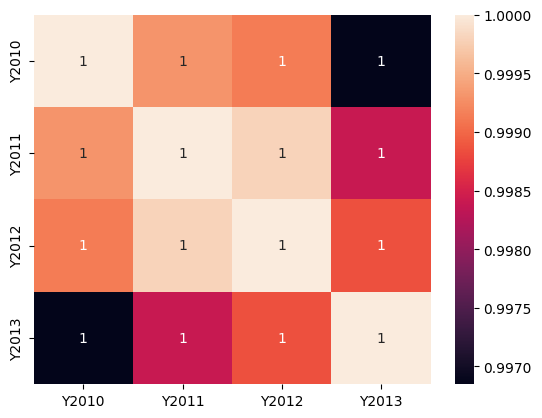

In [73]:
# Heatmap ?

sns.heatmap(corr, annot=True)

<Axes: >

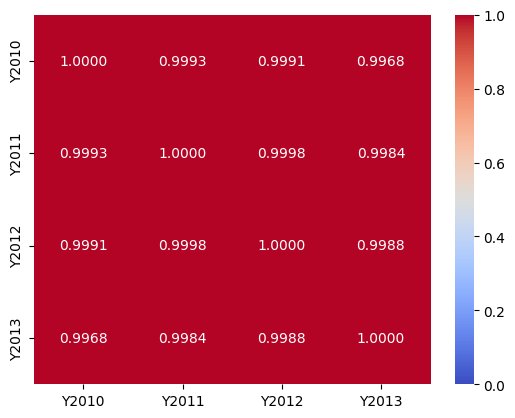

In [74]:
# Better heatmap ?

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".4f", vmin=0, vmax=1)

<Axes: >

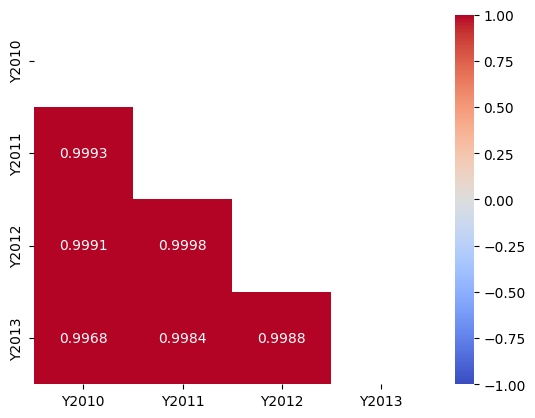

In [75]:
# Best heatmap ever done ?

mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".4f", vmin=-1, vmax=1, mask=mask)

In [76]:
# Build your first function


def corr_heatmap(df):
    tmp = df.select_dtypes(include="number")
    corr = tmp.corr()
    mask = np.triu(corr)
    sns.heatmap(
        corr, annot=True, cmap="coolwarm", fmt=".4f", vmin=-1, vmax=1, mask=mask
    )

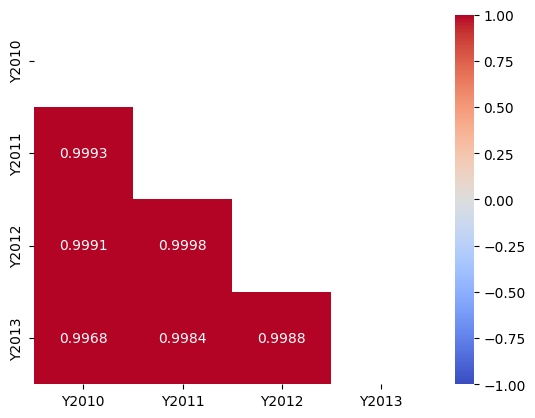

In [77]:
# Use this function

corr_heatmap(df)

## Visualisation

### Distplot

In [78]:
# Just to be sure

df.sort_values("Y2010", ascending=False).head(20)

,Area,Y2010,Y2011,Y2012,Y2013
20475,United States of America,12071.0,11602.0,11736,11598
2612,Brazil,7553.0,7694.0,7811,7863
4208,"China, mainland",6516.0,6443.0,6606,7089
16140,Russian Federation,2464.0,2330.0,2444,2425
626,Argentina,2206.0,2238.0,2272,2300
12799,Mexico,1922.0,1915.0,1843,1876
9111,India,1764.0,1501.0,1511,1017
6992,France,1639.0,1612.0,1606,1531
14805,Pakistan,1464.0,1513.0,1557,1606
9890,Italy,1400.0,1308.0,1262,1135


In [79]:
# Just to be sure

df.sort_values("Y2010", ascending=False).tail(20)

,Area,Y2010,Y2011,Y2012,Y2013
7240,Gabon,11.0,10.0,12,14
11131,Latvia,11.0,10.0,10,10
11350,Lesotho,11.0,12.0,12,12
4608,Congo,10.0,11.0,14,19
19230,Togo,10.0,10.0,11,10
7119,French Polynesia,9.0,9.0,9,9
15866,Republic of Moldova,9.0,7.0,7,5
17268,Sierra Leone,9.0,11.0,12,12
19347,Trinidad and Tobago,8.0,6.0,8,8
4067,"China, Macao SAR",8.0,9.0,6,6


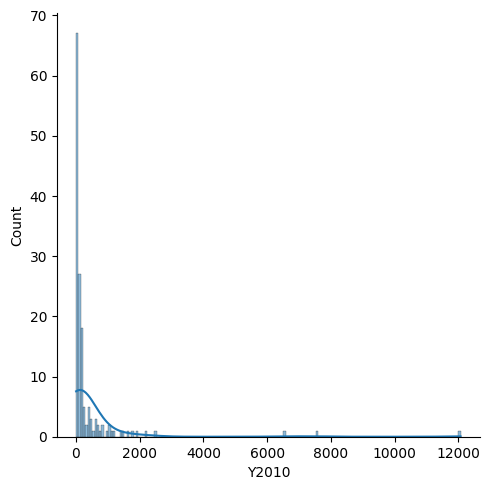

In [80]:
# Distplot

sns.displot(df.Y2010, kde=True)

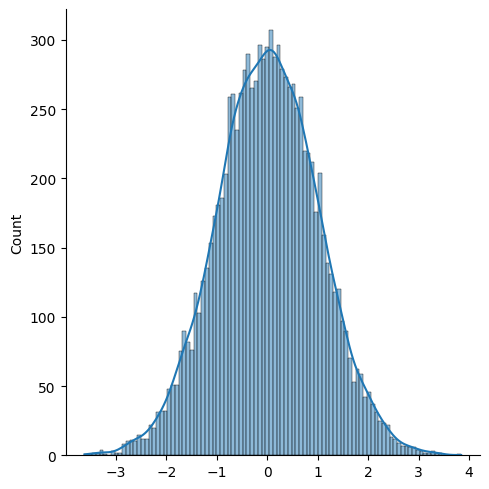

In [81]:
# Distplot normal

sns.displot(np.random.normal(size=10000), kde=True, bins=100)

In [82]:
# What about skewness ?

df.Y2010.skew()

6.640742005110601

In [83]:
# What about kurtosis ?

df.Y2010.kurtosis()

50.40896316432359

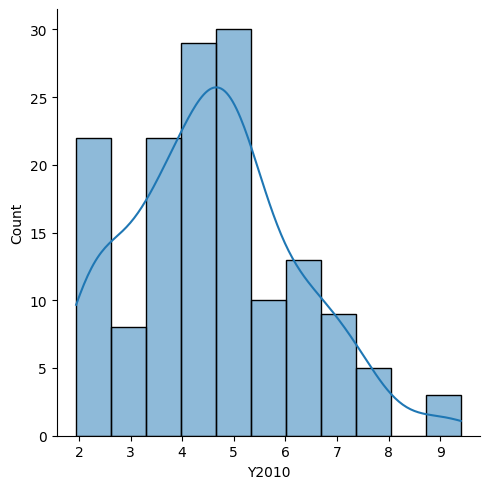

In [84]:
# Log1p => log(x+1) ?

log_Y2010 = np.log1p(df.Y2010)
sns.displot(log_Y2010, kde=True)

In [85]:
# Top 5

top_5 = df.sort_values("Y2010", ascending=False).head(5)
top_5

,Area,Y2010,Y2011,Y2012,Y2013
20475,United States of America,12071.0,11602.0,11736,11598
2612,Brazil,7553.0,7694.0,7811,7863
4208,"China, mainland",6516.0,6443.0,6606,7089
16140,Russian Federation,2464.0,2330.0,2444,2425
626,Argentina,2206.0,2238.0,2272,2300


### Barplot

<Axes: xlabel='Area', ylabel='Y2010'>

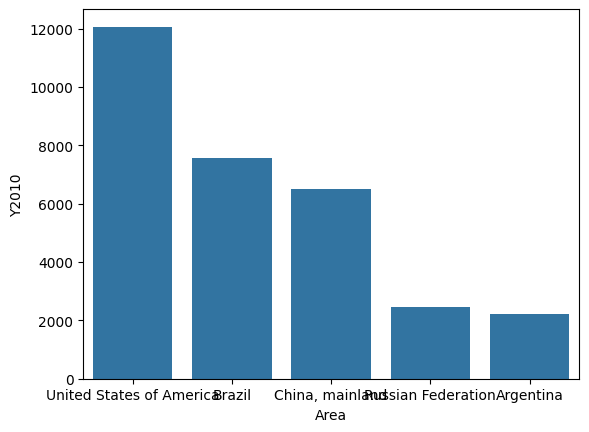

In [86]:
# Bar plot

sns.barplot(data=top_5, x="Area", y="Y2010")

In [87]:
# Same but better

px.bar(data_frame=top_5, x="Area", y="Y2010")

ModuleNotFoundError: No module named 'tenacity.asyncio'

ModuleNotFoundError: No module named 'tenacity.asyncio'

ModuleNotFoundError: No module named 'tenacity.asyncio'

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Area=%{x}<br>Y2010=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['United States of America', 'Brazil', 'China, mainland',
                          'Russian Federation', 'Argentina'], dtype=object),
              'xaxis': 'x',
              'y': array([12071.,  7553.,  6516.,  2464.,  2206.]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Area'}},
               'yaxis': {'anchor': 'x', 'domain

### Boxplot

<Axes: ylabel='Y2010'>

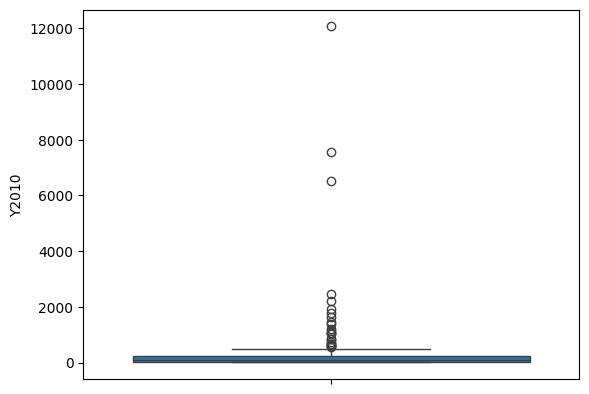

In [88]:
# My favorite plot EVER ;)

sns.boxplot(data=df.Y2010)

<Axes: ylabel='Y2010'>

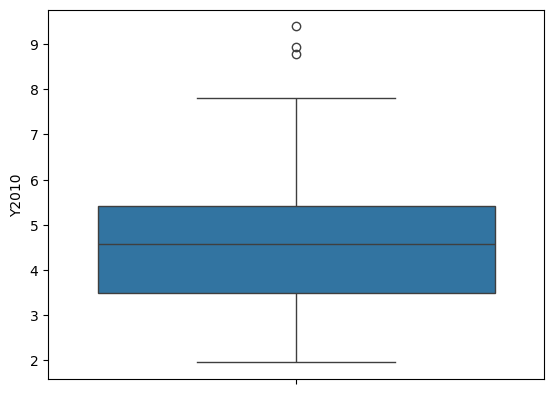

In [89]:
# Ok, this one

sns.boxplot(data=np.log1p(df.Y2010))

In [90]:
# Just another df output

df

,Area,Y2010,Y2011,Y2012,Y2013
47,Afghanistan,133.0,141.0,153,140
153,Albania,67.0,67.0,71,71
280,Algeria,171.0,186.0,222,220
388,Angola,130.0,143.0,170,181
626,Argentina,2206.0,2238.0,2272,2300
...,...,...,...,...,...
20954,Venezuela (Bolivarian Republic of),553.0,595.0,646,787
21065,Viet Nam,479.0,645.0,679,682
21187,Yemen,113.0,112.0,114,116
21306,Zambia,75.0,68.0,69,69


### Lineplot

In [91]:
# Melt ?

melt = pd.melt(df, id_vars=["Area"], value_vars=["Y2010", "Y2011", "Y2012", "Y2013"])
melt

,Area,variable,value
0,Afghanistan,Y2010,133.0
1,Albania,Y2010,67.0
2,Algeria,Y2010,171.0
3,Angola,Y2010,130.0
4,Argentina,Y2010,2206.0
...,...,...,...
599,Venezuela (Bolivarian Republic of),Y2013,787.0
600,Viet Nam,Y2013,682.0
601,Yemen,Y2013,116.0
602,Zambia,Y2013,69.0


<Axes: xlabel='variable', ylabel='value'>

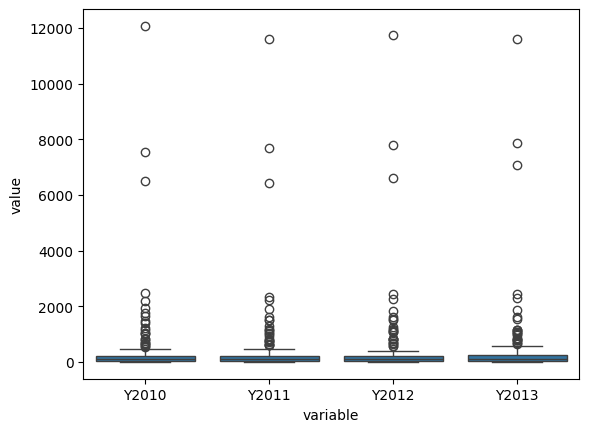

In [92]:
# Boxplot

sns.boxplot(data=melt, x="variable", y="value")

In [93]:
# Line plot

px.line(data_frame=melt, x="variable", y="value", color="Area")

ModuleNotFoundError: No module named 'tenacity.asyncio'

ModuleNotFoundError: No module named 'tenacity.asyncio'

ModuleNotFoundError: No module named 'tenacity.asyncio'

Figure({
    'data': [{'hovertemplate': 'Area=Afghanistan<br>variable=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Afghanistan',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Afghanistan',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Y2010', 'Y2011', 'Y2012', 'Y2013'], dtype=object),
              'xaxis': 'x',
              'y': array([133., 141., 153., 140.]),
              'yaxis': 'y'},
             {'hovertemplate': 'Area=Albania<br>variable=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Albania',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Albania',
              'orientation': 'v',
              'showlegend': True,
              '

In [94]:
# Melt only top 5

melt = pd.melt(top_5, id_vars=["Area"], value_vars=["Y2010", "Y2011", "Y2012", "Y2013"])
px.line(data_frame=melt, x="variable", y="value", color="Area")

ModuleNotFoundError: No module named 'tenacity.asyncio'

ModuleNotFoundError: No module named 'tenacity.asyncio'

ModuleNotFoundError: No module named 'tenacity.asyncio'

Figure({
    'data': [{'hovertemplate': 'Area=United States of America<br>variable=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'United States of America',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'United States of America',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['Y2010', 'Y2011', 'Y2012', 'Y2013'], dtype=object),
              'xaxis': 'x',
              'y': array([12071., 11602., 11736., 11598.]),
              'yaxis': 'y'},
             {'hovertemplate': 'Area=Brazil<br>variable=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Brazil',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Brazil',
              'orientation': 'v',
     

## Export

Export the csv file : 

In [95]:
df.to_csv("data.csv", index=False)